In [1]:
import cv2
import random
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import logging
from datetime import datetime

logger = logging.getLogger(__name__)

In [2]:
data = np.load('/Users/stanleypark/Desktop/code/hebbian_sequence_learning/figures/article/1/output/behaviors1.npz') 

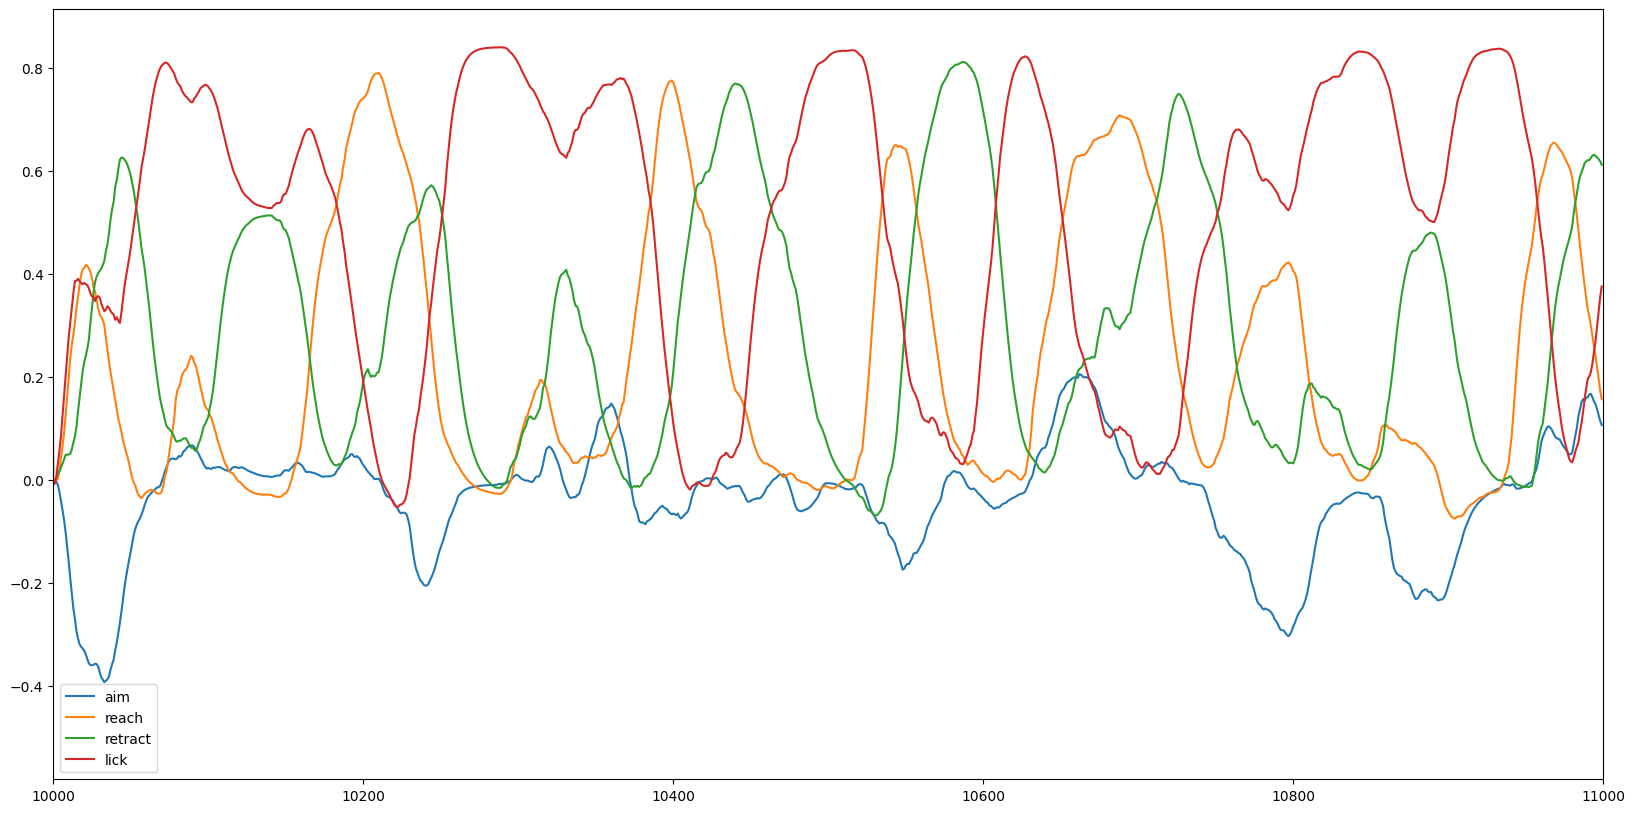

In [3]:
correlations = data['correlations']
plt.figure(figsize=(20, 10))
plt.plot(correlations[0], label="aim")
plt.plot(correlations[1], label="reach")
plt.plot(correlations[2], label="retract")
plt.plot(correlations[3], label="lick")
plt.legend()
plt.xlim(10000, 11000)
plt.show()


In [4]:
def read(frames, img_array):
    for frame in frames:
        img = cv2.imread(frame)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
    return size

In [ ]:
data = np.load('/Users/stanleypark/Desktop/code/hebbian_sequence_learning/figures/article/1/output/behaviors1.npz') 
behaviors = data['behaviors']
# behaviors = np.random.randint(4, size=100)

dir = "/Users/stanleypark/Desktop/code/hebbian_sequence_learning/figures/article/1/images/"

img_array = []
print('Reading images')
for i in trange(len(behaviors)):
    action = behaviors[i]
    if action == -1:
        continue
    if action == 0:
        frames = [dir+str(i)+'.jpg' for i in range(5283, 5289)]
    elif action == 1:
        frames = [dir+str(i)+'.jpg' for i in range(5289, 5296)]
    elif action == 2:
        frames = [dir+str(i)+'.jpg' for i in range(5296, 5303)]
    elif action == 3:
        if behaviors[i-2] == 1 and behaviors[i-1] == 2:
            frames = [dir+str(i)+'.jpg' for i in range(5303, 5323)]
        else:
            frames = [dir+str(i)+'.jpg' for i in range(263, 270)]

    size = read(frames, img_array)
out = cv2.VideoWriter('/Users/stanleypark/Desktop/code/hebbian_sequence_learning/figures/article/1/output/mouse-simulation1.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
print('Writing video')
for i in trange(len(img_array)):
    out.write(img_array[i])
out.release()

Reading images


100%|█████████████████████████████████████| 10000/10000 [02:59<00:00, 55.65it/s]
OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Writing video


 64%|███████████████████████▌             | 38480/60339 [06:27<04:12, 86.51it/s]